#Developing a ML Model using Gaussian Naive Bayes Classifer with Wisconsin Breast Cancer Dataset

#### The goal of this analysis is to develop a ML Model to accurately distinguish between a benign and malignant tumor to aid in clinical diagnosis.

In [30]:
from datetime import date

today = date.today()
print(f"Today's date is {today}. its me Sahana.D !")


Today's date is 2025-02-17. its me Sahana.D !


In [31]:
from google.colab import drive

# This will prompt you to authorize access
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [32]:
#Data Aquisition
import pandas as pd
import numpy as np
import seaborn as sns



In [33]:
df=pd.read_csv("/content/drive/MyDrive/wisc_bc_data.csv")

# DATA PRE PROCESSING
steps: 1) Understand data and its features
       2) Address the Missing values

In [34]:
df.shape #checking the overall shape

(569, 32)

###### my observation: There are 569 rows/observations and 32 columns/features in this dataset.

In [35]:
df.isna().values.sum() #check the missing value

0

###### my Observation : No Missing Values

In [36]:
df.dtypes

,0
id,int64
diagnosis,object
radius_mean,float64
texture_mean,float64
perimeter_mean,float64
area_mean,float64
smoothness_mean,float64
compactness_mean,float64
concavity_mean,float64
concave points_mean,float64


id is integer. diagnosis is an object. Rest of the features are floats.

In [37]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,569.0,3.037183e+07,1.250206e+08,8670.000000,869218.000000,906024.000000,8.813129e+06,9.113205e+08
radius_mean,569.0,1.412729e+01,3.524049e+00,6.981000,11.700000,13.370000,1.578000e+01,2.811000e+01
texture_mean,569.0,1.928965e+01,4.301036e+00,9.710000,16.170000,18.840000,2.180000e+01,3.928000e+01
perimeter_mean,569.0,9.196903e+01,2.429898e+01,43.790000,75.170000,86.240000,1.041000e+02,1.885000e+02
area_mean,569.0,6.548891e+02,3.519141e+02,143.500000,420.300000,551.100000,7.827000e+02,2.501000e+03
smoothness_mean,569.0,9.636028e-02,1.406413e-02,0.052630,0.086370,0.095870,1.053000e-01,1.634000e-01
compactness_mean,569.0,1.043410e-01,5.281276e-02,0.019380,0.064920,0.092630,1.304000e-01,3.454000e-01
concavity_mean,569.0,8.879932e-02,7.971981e-02,0.000000,0.029560,0.061540,1.307000e-01,4.268000e-01
concave points_mean,569.0,4.891915e-02,3.880284e-02,0.000000,0.020310,0.033500,7.400000e-02,2.012000e-01
symmetry_mean,569.0,1.811619e-01,2.741428e-02,0.106000,0.161900,0.179200,1.957000e-01,3.040000e-01


In [38]:
#statistical summary of the non numerical columns
df.describe(exclude=np.number).T

,count,unique,top,freq
diagnosis,569,2,B,357


In [39]:
df[["id", "diagnosis", "radius_mean", "texture_mean","concave points_worst"]].head(5)

,id,diagnosis,radius_mean,texture_mean,concave points_worst
0,842302,M,17.99,10.38,0.2654
1,842517,M,20.57,17.77,0.1860
2,84300903,M,19.69,21.25,0.2430
3,84348301,M,11.42,20.38,0.2575
4,84358402,M,20.29,14.34,0.1625


observation: id values are meaningless. we can drop it

In [40]:
df['diagnosis'].value_counts()

,count
diagnosis,
B,357
M,212


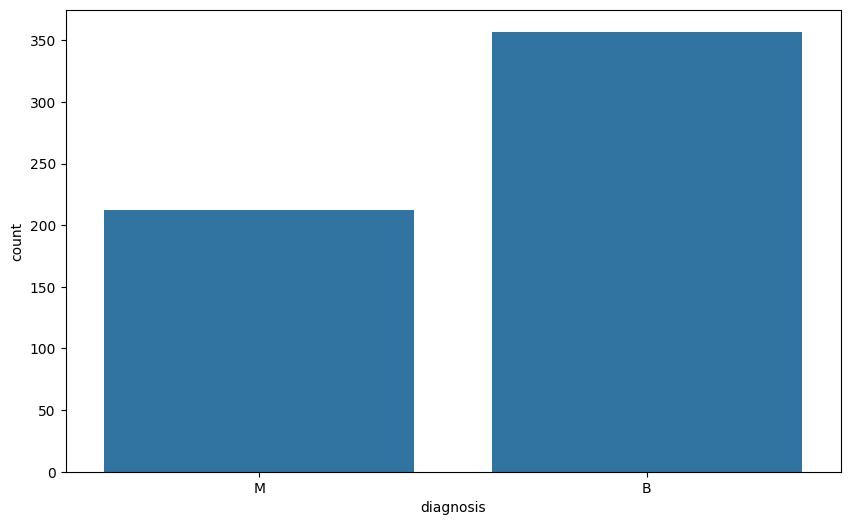

In [46]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
ax = sns.countplot(x='diagnosis', data=df)

<Axes: xlabel='count', ylabel='diagnosis'>

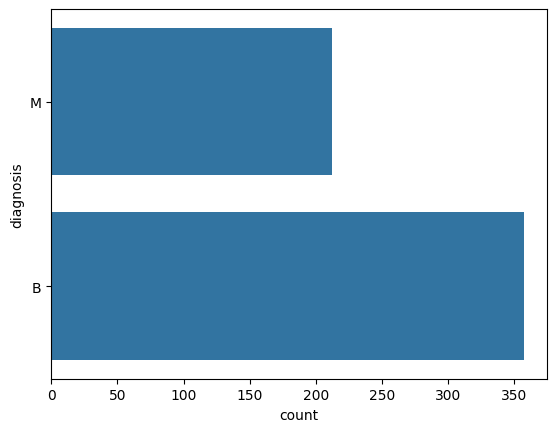

In [44]:
sns.countplot(df['diagnosis'])

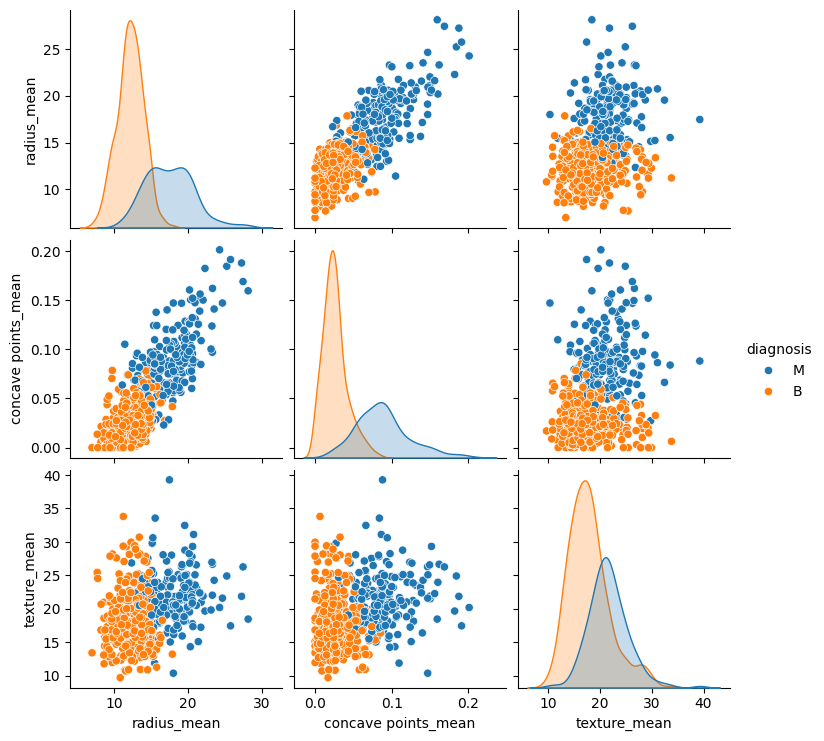

In [47]:
sns.pairplot(df[["diagnosis","radius_mean","concave points_mean","texture_mean"]],hue='diagnosis')

Observation: There is adistinguishable seperation between the two clusters of data. The Cluster appears to exhibit some normal distribution(most points are localized closer to center, with fewer points further away). we may try Naive Bayes Classifer which tends to work well this type of data.

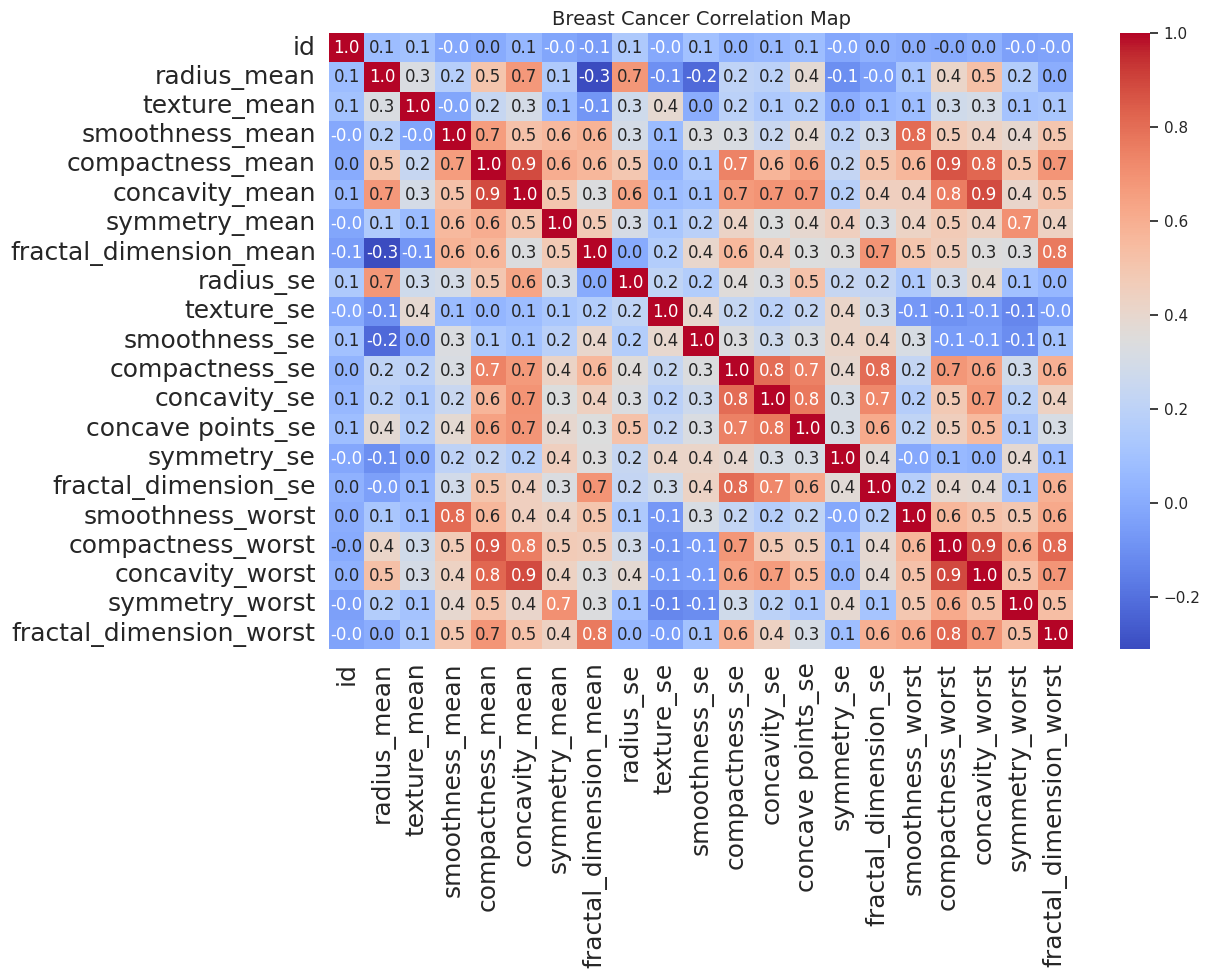

In [62]:
#heatmap
numeric_df = df.select_dtypes(include=[np.number])

# Create a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(numeric_df.corr(), annot=True, fmt=".1f", cmap="coolwarm")

# Customize the plot
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.title('Breast Cancer Correlation Map', fontsize=14)

# Show the plot
plt.show()


Observation: There are correlation between multiple features in this dataset. Strong correleation between independent variables will lead to multicolllinearity / lead to less reliable statistical inferences and so less reliable results. To ensure the dataset is purgedof any such problems, we simply drop the features with very high degree of correlation.

In [60]:
# Select only numeric columns for correlation calculation
numeric_df = df.select_dtypes(include=[np.number])

# Calculate the correlation matrix
corr_matrix = numeric_df.corr().abs()

# Create an upper triangle matrix mask
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Identify columns to drop based on a correlation threshold
to_drop = [column for column in upper.columns if any(upper[column] > 0.90)]

print("Columns to drop due to high correlation:\n", to_drop)


Columns to drop due to high correlation:
 ['perimeter_mean', 'area_mean', 'concave points_mean', 'perimeter_se', 'area_se', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'concave points_worst']


In [61]:
df.drop(to_drop,axis=1,inplace=True)

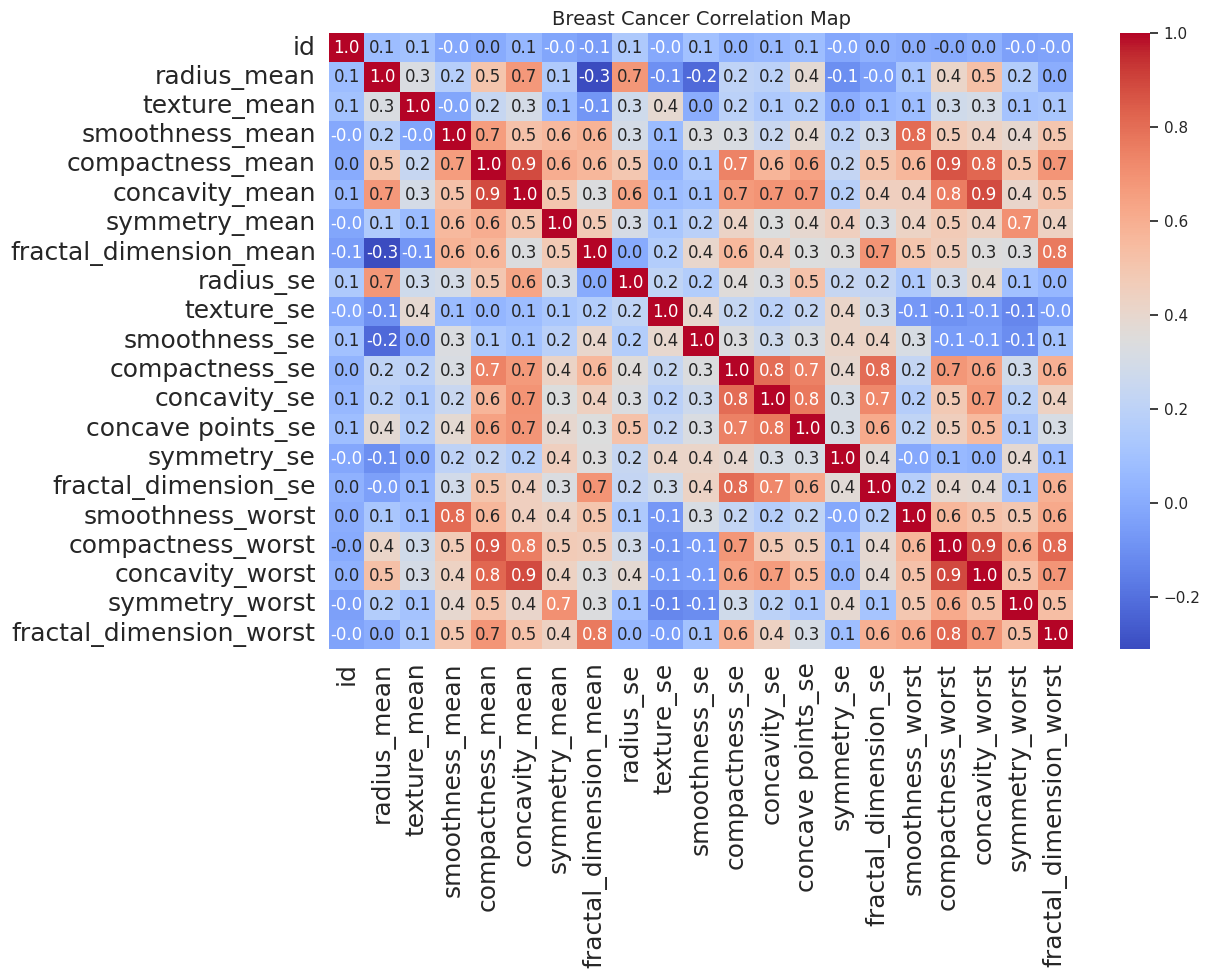

In [63]:
numeric_df = df.select_dtypes(include=[np.number])

# Create a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(numeric_df.corr(), annot=True, fmt=".1f", cmap="coolwarm")

# Customize the plot
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.title('Breast Cancer Correlation Map', fontsize=14)

# Show the plot
plt.show()

The correlations are now addressed. we only have 19 features out of 30 now

DEVELOP THE MODEL

In [64]:
 X = df.drop(columns = ["id","diagnosis"]) # Drop the id and the target diagnosis
 y= df.diagnosis.values

In [65]:
X.head()

,radius_mean,texture_mean,smoothness_mean,compactness_mean,concavity_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,smoothness_worst,compactness_worst,concavity_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,0.11840,0.27760,0.3001,0.2419,0.07871,1.0950,0.9053,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,0.1622,0.6656,0.7119,0.4601,0.11890
1,20.57,17.77,0.08474,0.07864,0.0869,0.1812,0.05667,0.5435,0.7339,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,0.1238,0.1866,0.2416,0.2750,0.08902
2,19.69,21.25,0.10960,0.15990,0.1974,0.2069,0.05999,0.7456,0.7869,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,0.1444,0.4245,0.4504,0.3613,0.08758
3,11.42,20.38,0.14250,0.28390,0.2414,0.2597,0.09744,0.4956,1.1560,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,0.2098,0.8663,0.6869,0.6638,0.17300
4,20.29,14.34,0.10030,0.13280,0.1980,0.1809,0.05883,0.7572,0.7813,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,0.1374,0.2050,0.4000,0.2364,0.07678


In [66]:
#Normalize the dataset
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_scaled = pd.DataFrame(scaler.fit_transform(X),columns = X.columns)

In [67]:
#Split the dataset

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, random_state = 40)

Gaussian Naive Bayes classifier :
 p(label|data) = (p(data|label) * p(label) ) / p(data)

In [68]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

#instance
gnb_clf = GaussianNB()

gnb_clf.fit(X_train,y_train)

gnb_pred = gnb_clf.predict(X_test)

print(accuracy_score(gnb_pred,y_test))

0.965034965034965


calculate the precision, recall and f1 score

In [69]:
from sklearn.metrics import classification_report

print(classification_report(gnb_pred,y_test))

              precision    recall  f1-score   support

           B       0.98      0.97      0.97        99
           M       0.93      0.95      0.94        44

    accuracy                           0.97       143
   macro avg       0.96      0.96      0.96       143
weighted avg       0.97      0.97      0.97       143



Conclusion:

The model performs slightly better on classifying benign cases (class B) than malignant cases (class M), as indicated by higher precision and recall for class B.

Overall, the classifier demonstrates strong performance with high precision, recall, and F1-scores for both classes.

The results suggest that Gaussian Naive Bayes is a suitable algorithm for this classification problem, achieving high accuracy and balanced performance across both classes.
